In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [16]:
import tensorflow_datasets as tfds

tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [17]:
%tensorflow_version 2.x

In [ ]:
celeb_a = tfds.load('celeb_a')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

DownloadError: ignored

데이터 로드가 진행되지 않아 따로 데이터를 다운받고 사용하겠습니다.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
!ls -al /content/drive/'MyDrive'/celeba_small.npz

-rw------- 1 root root 173961605 Mar  9 16:32 /content/drive/MyDrive/celeba_small.npz


In [31]:
celeba_small = np.load('/content/drive/MyDrive/celeba_small.npz')

In [34]:
list(celeba_small.keys())

['train_images', 'train_labels', 'test_images', 'test_labels']

In [35]:
x = celeba_small['train_images'][0]
y = celeba_small['train_labels'][0]

In [36]:
print(x.shape)
print(y.shape)

(72, 59, 3)
(2,)


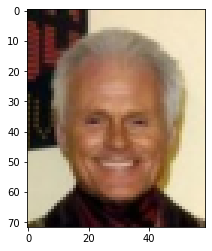

[1 1]


In [39]:
plt.imshow(celeba_small['train_images'][3])
plt.show()
print(celeba_small['train_labels'][3])

In [40]:
celeba_small = np.load('/content/drive/MyDrive/celeba_small.npz')
train_images = celeba_small['train_images']
test_images = celeba_small['test_images']

train_labels = celeba_small['train_labels']
test_labels = celeba_small['test_labels']

In [41]:
train_images[train_images != 0][:10]

array([0.02352941, 0.04313725, 0.05490196, 0.01960784, 0.03921569,
       0.05490196, 0.01977401, 0.03921569, 0.05114656, 0.02352941])

In [42]:
train_images.dtype

dtype('float64')

In [44]:
print(train_images.max(), train_images.min())
print(train_labels.max(), train_labels.min())

print(test_images.max(), test_images.min())
print(test_labels.max(), test_labels.min())

1.0 0.0
1 0
1.0 0.0
1 0


In [49]:
from tensorflow.keras.utils import to_categorical
train_male_labels, train_smile_labels = np.split(train_labels, 2, axis = 1)
test_male_labels, test_smile_labels = np.split(test_labels, 2, axis = 1)
print(train_male_labels.shape, train_smile_labels.shape)
print(test_male_labels.shape, test_smile_labels.shape)

(2000, 1) (2000, 1)
(200, 1) (200, 1)


In [51]:
train_male_labels = to_categorical(train_male_labels)
train_smile_labels = to_categorical(train_smile_labels)
test_male_labels = to_categorical(test_male_labels)
test_smile_labels = to_categorical(test_smile_labels)

In [52]:
print(train_male_labels.shape)
print(train_smile_labels.shape)
print(test_male_labels.shape)
print(test_smile_labels.shape)

(2000, 2)
(2000, 2)
(200, 2)
(200, 2)


In [53]:
train_labels2 = np.concatenate([train_male_labels, train_smile_labels], axis = 1)
test_labels2 = np.concatenate([test_male_labels, test_smile_labels], axis = 1)
print(train_labels2.shape)
print(test_labels2.shape)

(2000, 4)
(200, 4)


[[0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]]


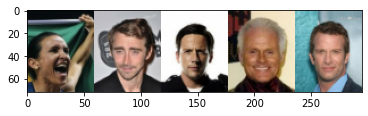

In [58]:
plt.imshow(np.hstack(train_images[:5]))
print(train_labels[:5])
plt.show()

In [61]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, Flatten, Dense

def simple_model():
  inputs = Input((72, 59, 3))

  x = Conv2D(32, 3, activation = 'relu')(inputs)
  x = MaxPool2D(2)(x)
  x = Conv2D(64, 3, activation = 'relu')(x)
  x = MaxPool2D(2)(x)
  x = Conv2D(64, 3, activation = 'relu')(x)
  x = MaxPool2D(2)(x)

  x = Flatten()(x)
  x = Dense(64, activation='relu')(x)

  outputs = Dense(2, activation='softmax')(x)
  model = Model(inputs, outputs)
  return model

In [62]:
gender_model = simple_model()
smile_model = simple_model()

In [63]:
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72, 59, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 28, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 11, 64)        36928 

In [65]:
smile_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 72, 59, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 35, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 11, 64)        3692

In [66]:
gender_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
smile_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [67]:
gender_hist = gender_model.fit(train_images, train_male_labels, validation_data=(test_images, test_male_labels), epochs=15, verbose = 1)

Epoch 1/15
63/63 [==============================] - 11s 21ms/step - loss: 0.5941 - accuracy: 0.6695 - val_loss: 0.5363 - val_accuracy: 0.7250
Epoch 2/15
63/63 [==============================] - 1s 13ms/step - loss: 0.4570 - accuracy: 0.7890 - val_loss: 0.4430 - val_accuracy: 0.8400
Epoch 3/15
63/63 [==============================] - 1s 13ms/step - loss: 0.3079 - accuracy: 0.8655 - val_loss: 0.3229 - val_accuracy: 0.8950
Epoch 4/15
63/63 [==============================] - 1s 13ms/step - loss: 0.2002 - accuracy: 0.9180 - val_loss: 0.2653 - val_accuracy: 0.9000
Epoch 5/15
63/63 [==============================] - 1s 13ms/step - loss: 0.1490 - accuracy: 0.9440 - val_loss: 0.2379 - val_accuracy: 0.9150
Epoch 6/15
63/63 [==============================] - 1s 14ms/step - loss: 0.1146 - accuracy: 0.9605 - val_loss: 0.2982 - val_accuracy: 0.9050
Epoch 7/15
63/63 [==============================] - 1s 14ms/step - loss: 0.1054 - accuracy: 0.9540 - val_loss: 0.2280 - val_accuracy: 0.9200
Epoch 8/15
6

In [68]:
smile_hist = smile_model.fit(train_images, train_smile_labels, validation_data=(test_images, test_smile_labels), epochs=15, verbose = 1)

Epoch 1/15
63/63 [==============================] - 2s 19ms/step - loss: 0.6928 - accuracy: 0.5200 - val_loss: 0.7093 - val_accuracy: 0.4850
Epoch 2/15
63/63 [==============================] - 1s 14ms/step - loss: 0.6761 - accuracy: 0.5780 - val_loss: 0.6529 - val_accuracy: 0.6300
Epoch 3/15
63/63 [==============================] - 1s 14ms/step - loss: 0.6269 - accuracy: 0.6425 - val_loss: 0.5326 - val_accuracy: 0.7500
Epoch 4/15
63/63 [==============================] - 1s 13ms/step - loss: 0.4814 - accuracy: 0.7820 - val_loss: 0.3696 - val_accuracy: 0.8300
Epoch 5/15
63/63 [==============================] - 1s 14ms/step - loss: 0.3473 - accuracy: 0.8525 - val_loss: 0.2776 - val_accuracy: 0.8900
Epoch 6/15
63/63 [==============================] - 1s 13ms/step - loss: 0.2841 - accuracy: 0.8835 - val_loss: 0.2821 - val_accuracy: 0.8800
Epoch 7/15
63/63 [==============================] - 1s 13ms/step - loss: 0.2505 - accuracy: 0.8885 - val_loss: 0.2441 - val_accuracy: 0.9200
Epoch 8/15
63

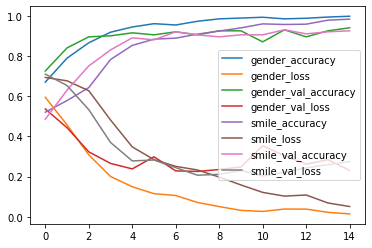

In [69]:
plt.plot(gender_hist.history['accuracy'], label = 'gender_accuracy')
plt.plot(gender_hist.history['loss'], label = 'gender_loss')
plt.plot(gender_hist.history['val_accuracy'], label = 'gender_val_accuracy')
plt.plot(gender_hist.history['val_loss'], label = 'gender_val_loss')

plt.plot(smile_hist.history['accuracy'], label = 'smile_accuracy')
plt.plot(smile_hist.history['loss'], label = 'smile_loss')
plt.plot(smile_hist.history['val_accuracy'], label = 'smile_val_accuracy')
plt.plot(smile_hist.history['val_loss'], label = 'smile_val_loss')

plt.legend(loc = 'uppder left')
plt.show()

In [70]:
gender_res = gender_model.predict(test_images[0:1])
gender_res.shape

(1, 2)

In [71]:
smile_res = smile_model.predict(test_images[0:1])
smile_res.shape

(1, 2)

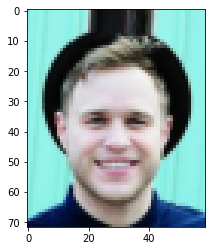

In [72]:
plt.imshow(test_images[0])
plt.show()

In [73]:
print(gender_res)
print(smile_res)

# [여자 : 남자]
# [안웃음 : 웃음]

[[4.4814537e-06 9.9999547e-01]]
[[2.230807e-05 9.999777e-01]]


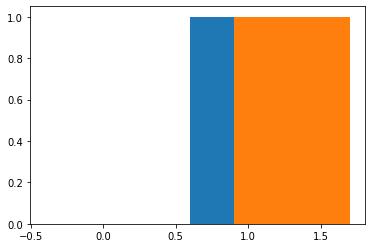

In [77]:
plt.bar(range(2), gender_res[0])
plt.bar(np.array(range(2)) + 0.3, test_male_labels[0])
plt.show()

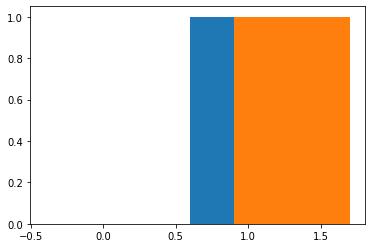

In [79]:
plt.bar(range(2), smile_res[0])
plt.bar(np.array(range(2)) + 0.3, test_smile_labels[0])
plt.show()